### Exploratory Data Analysis (EDA) on Uber Dataset

In this section, we perform an exploratory data analysis (EDA) to understand the structure and basic statistics of the Uber dataset. The analysis includes data cleaning, basic summary statistics, and visualizations to uncover insights about the dataset.

#### 1. **Data Import and Preprocessing**

We begin by importing the necessary libraries:
- **Pandas** is used for data manipulation and analysis.
- **Matplotlib** and **Seaborn** are used for data visualization.

The dataset is loaded using `pandas.read_csv()` into a DataFrame called `uber_data`. The first few rows of the dataset are displayed using the `.head()` method to get an overview of the dataset's structure.

#### 2. **Data Cleaning and Conversion**

- **Date Conversion**: We convert the `START_DATE` and `END_DATE` columns to datetime format using `pd.to_datetime()`. This ensures that we can perform time-based operations (such as calculating trip duration) on the date columns.
- **Drop Missing Values**: After conversion, any rows with invalid or missing date values are dropped using the `.dropna()` method, as these would interfere with further analysis.

#### 3. **Dataset Overview**

- **Total Trips**: The total number of trips in the dataset is displayed using `len(uber_data)`.
- **Date Range**: The range of dates (from the earliest to the latest trip) is displayed using `uber_data['START_DATE'].min()` and `uber_data['END_DATE'].max()`.
- **Numerical Statistics**: Summary statistics for the numerical columns `MILES` and `DURATION` are printed using `.describe()`. These statistics give insights into the central tendency, spread, and potential outliers of the data.

#### 4. **Missing Values Analysis**

The missing values for each column in the dataset are calculated using `uber_data.isnull().sum()`. This helps identify any columns with missing or incomplete data.

#### 5. **Categorical Analysis**

- **Category Counts**: We calculate the frequency of each category in the `CATEGORY` column using `.value_counts()`.
- **Purpose Counts**: We calculate the frequency of each purpose in the `PURPOSE` column using `.value_counts()`.

#### 6. **Visualizations**

We create two bar plots to visualize the frequency of trips by category and purpose:
- **Category Distribution**: A bar plot is created for the `CATEGORY` column, which shows the number of trips for each category (e.g., "Business", "Personal"). Customizations include:
  - Title and axis labels with increased font size for better readability.
  - Grid lines added for improved visibility of the bars.
  - Value annotations added to each bar to show the count on top of each bar.
  - X-axis labels rotated for better readability.

- **Purpose Distribution**: A similar bar plot is created for the `PURPOSE` column, showing the number of trips for each purpose (e.g., "Meeting", "Meal/Entertain"). The same customizations are applied as in the category distribution plot.

These visualizations help us quickly grasp the distribution of trips across different categories and purposes.

---

By performing these basic steps of exploratory data analysis, we have gained a clearer understanding of the Uber dataset, including its structure, summary statistics, and key distributions. This analysis sets the foundation for further exploration, such as identifying patterns or building models based on the data.

In [10]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For creating static visualizations
import seaborn as sns  # For creating statistical visualizations

# Read the CSV file into a pandas DataFrame
uber_data = pd.read_csv('UberDataset.csv')  # Load the dataset from the provided file

# Convert the 'START_DATE' column to datetime format
# The 'errors="coerce"' argument will replace invalid parsing with NaT (Not a Time)
uber_data['START_DATE'] = pd.to_datetime(uber_data['START_DATE'], errors='coerce')

# Convert the 'END_DATE' column to datetime format
# This ensures consistency in date-time processing for further analysis
uber_data['END_DATE'] = pd.to_datetime(uber_data['END_DATE'], errors='coerce')

# Drop rows with invalid dates
uber_data = uber_data.dropna(subset=['START_DATE', 'END_DATE'])

In [11]:
# Display the first 5 rows of the dataset to get an overview of its structure and content
uber_data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [12]:
# Display a concise summary of the dataset, including the number of non-null values and data types of each column
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420 entries, 0 to 1047
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  420 non-null    datetime64[ns]
 1   END_DATE    420 non-null    datetime64[ns]
 2   CATEGORY    420 non-null    object        
 3   START       420 non-null    object        
 4   STOP        420 non-null    object        
 5   MILES       420 non-null    float64       
 6   PURPOSE     261 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 26.2+ KB


In [13]:
# Calculate the duration of each trip in minutes
uber_data['DURATION'] = (uber_data['END_DATE'] - uber_data['START_DATE']).dt.total_seconds() / 60

# Print dataset overview
print("Dataset Overview:")

# Display total number of trips in the dataset
print("Total Trips:", len(uber_data))

# Display the date range from the earliest to the latest trip
print("Date Range:", uber_data['START_DATE'].min(), "to", uber_data['END_DATE'].max())

# Print numerical statistics for the relevant columns (MILES and DURATION)
print("\nNumerical Statistics:")
print(uber_data[['MILES', 'DURATION']].describe())


Dataset Overview:
Total Trips: 420
Date Range: 2016-01-01 21:11:00 to 2016-12-12 20:57:00

Numerical Statistics:
            MILES    DURATION
count  420.000000  420.000000
mean     9.083810   19.326190
std     16.386685   19.155582
min      0.500000    0.000000
25%      2.775000    9.000000
50%      5.700000   15.000000
75%      9.900000   22.250000
max    174.200000  178.000000


In [14]:
#Summary statistics for numerical columns
numerical_summary = uber_data.describe()
numerical_summary

,START_DATE,END_DATE,MILES,DURATION
count,420,420,420.000000,420.000000
mean,2016-07-01 11:51:50.571428608,2016-07-01 12:11:10.142857216,9.083810,19.326190
min,2016-01-01 21:11:00,2016-01-01 21:17:00,0.500000,0.000000
25%,2016-03-27 14:54:00,2016-03-27 15:10:00,2.775000,9.000000
50%,2016-07-04 17:57:00,2016-07-04 18:19:00,5.700000,15.000000
75%,2016-10-10 17:24:45,2016-10-10 17:39:15,9.900000,22.250000
max,2016-12-12 20:48:00,2016-12-12 20:57:00,174.200000,178.000000
std,NaN,NaN,16.386685,19.155582


In [15]:
#Check for missing values in the dataset
missing_values = uber_data.isnull().sum()
missing_values

START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       159
DURATION        0
dtype: int64

In [16]:
#Categorical analysis (unique counts and value counts for categorical columns)
category_counts = uber_data['CATEGORY'].value_counts()
purpose_counts = uber_data['PURPOSE'].value_counts()
category_counts, purpose_counts

(CATEGORY
 Business    407
 Personal     13
 Name: count, dtype: int64,
 PURPOSE
 Meeting            81
 Meal/Entertain     64
 Errand/Supplies    47
 Customer Visit     46
 Temporary Site     14
 Between Offices     9
 Name: count, dtype: int64)

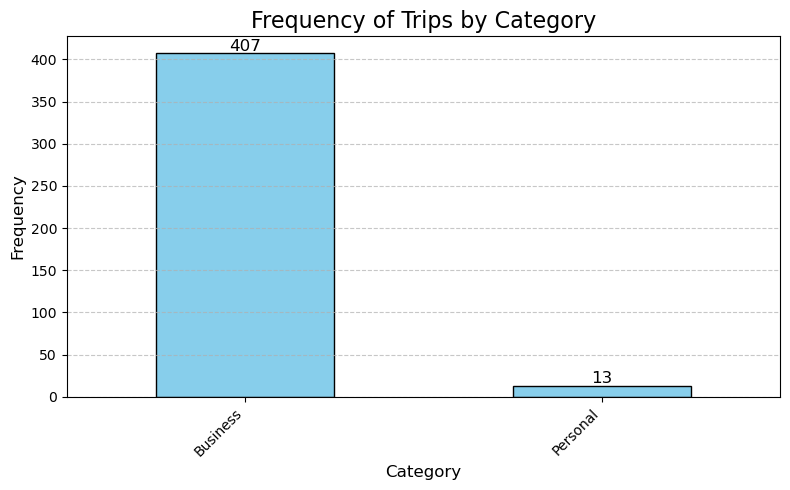

In [17]:
# Create a bar plot to visualize the frequency of each category
plt.figure(figsize=(8, 5))  # Set the figure size for better readability
ax = category_counts.plot(kind='bar', color='skyblue', edgecolor='black')  # Custom colors and edges for the bars

# Add a title and labels for the axes
plt.title('Frequency of Trips by Category', fontsize=16)  # Title with larger font
plt.xlabel('Category', fontsize=12)  # Label for x-axis
plt.ylabel('Frequency', fontsize=12)  # Label for y-axis

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add the value on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Ensure everything fits without overlapping
plt.tight_layout()

# Show the plot
plt.show()

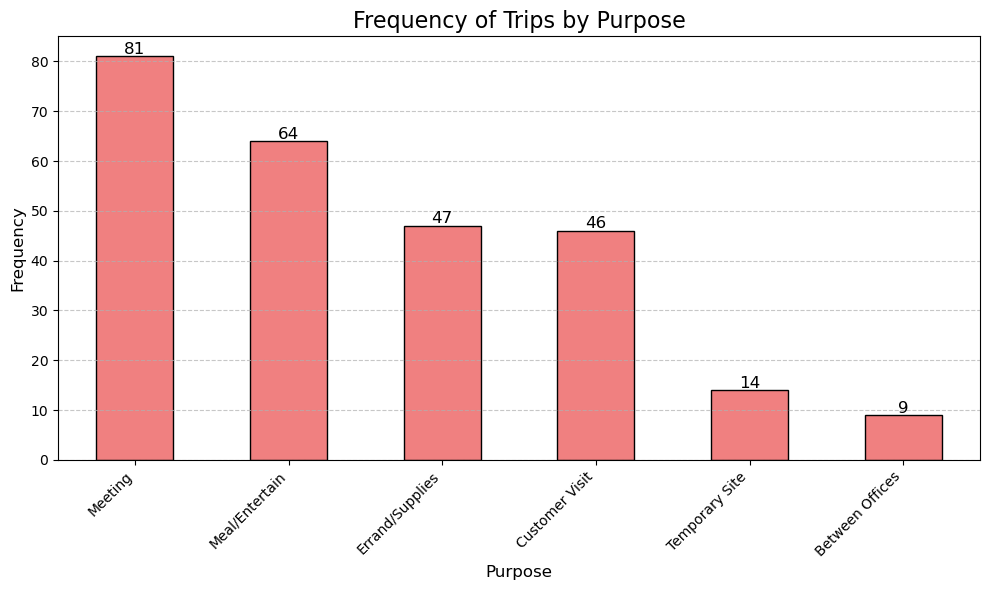

In [18]:
# Create a bar plot to visualize the frequency of each purpose
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
ax = purpose_counts.plot(kind='bar', color='lightcoral', edgecolor='black')  # Custom colors and edges for the bars

# Add a title and labels for the axes
plt.title('Frequency of Trips by Purpose', fontsize=16)  # Title with larger font
plt.xlabel('Purpose', fontsize=12)  # Label for x-axis
plt.ylabel('Frequency', fontsize=12)  # Label for y-axis

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add the value on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Ensure everything fits without overlapping
plt.tight_layout()

# Show the plot
plt.show()
